<a href="https://colab.research.google.com/github/antrecord/AI_python/blob/main/Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №1


##Нейросети
###Ксенофонтов Антон

4 курс

Группа: ИБАС-1-21

1 часть

Скачать один из наборов данных

Загрузить данные в датафрейм

Вывести статистическую информацию о наборе данных

Вывести названия столбцов и строк

Заменить категориальные данные количественными

Визуализировать данные с помощью Matplotlib и Seaborn

Должно быть не менее 2х визуализаций на каждый признак. Выберите самые красивые визуализации!

Должно быть не менее 3х групповых визуализаций

In [62]:
# Импортируем библиотеки
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
# Читаем датасет
data = pd.read_csv('/content/dataset.csv', sep=';', encoding='cp1252')
data.head(10)

,Student ID,Student Country,Question ID,Type of Answer,Question Level,Topic,Subtopic,Keywords
0,647,Ireland,77,0,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
1,41,Portugal,77,1,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
2,340,Portugal,77,1,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
3,641,Italy,77,0,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
4,669,Portugal,77,1,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
5,697,Portugal,77,1,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
6,720,Portugal,77,1,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
7,675,Portugal,77,1,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
8,663,Portugal,77,0,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."
9,28,Portugal,77,0,Basic,Statistics,Statistics,"Stem and Leaf diagram,Relative frequency,Sampl..."


In [64]:
# Выводим информацию
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9546 entries, 0 to 9545
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Student ID       9546 non-null   int64 
 1   Student Country  9546 non-null   object
 2   Question ID      9546 non-null   int64 
 3   Type of Answer   9546 non-null   int64 
 4   Question Level   9546 non-null   object
 5   Topic            9546 non-null   object
 6   Subtopic         9546 non-null   object
 7   Keywords         9546 non-null   object
dtypes: int64(3), object(5)
memory usage: 596.8+ KB


In [65]:
# Выводим информацию о типах столбцов
data.dtypes

,0
Student ID,int64
Student Country,object
Question ID,int64
Type of Answer,int64
Question Level,object
Topic,object
Subtopic,object
Keywords,object


In [66]:
# Названия столбцов и строк
print('Столбцы: ', list(data.columns.values))
print('Строки: ', list(data.index.values))

Столбцы:  ['Student ID', 'Student Country', 'Question ID', 'Type of Answer', 'Question Level', 'Topic', 'Subtopic', 'Keywords']
Строки:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 19

In [67]:
# Количество пустых ячеек
np.count_nonzero(data.isnull().sum(axis= 1).values)

0

In [68]:
# Заменяем категариальные переменные
table = pd.get_dummies(data, columns = ['Student Country', 'Question Level'], prefix = '', prefix_sep = '', drop_first = False)
# Удаляем стобцы со слишком разнообразными значениями
table = table.drop('Keywords', axis=1)
table = table.drop('Topic', axis=1)
table = table.drop('Subtopic', axis=1)
table.head(10)

,Student ID,Question ID,Type of Answer,Ireland,Italy,Lithuania,Portugal,Romania,Russian Federation,Slovenia,Spain,Advanced,Basic
0,647,77,0,True,False,False,False,False,False,False,False,False,True
1,41,77,1,False,False,False,True,False,False,False,False,False,True
2,340,77,1,False,False,False,True,False,False,False,False,False,True
3,641,77,0,False,True,False,False,False,False,False,False,False,True
4,669,77,1,False,False,False,True,False,False,False,False,False,True
5,697,77,1,False,False,False,True,False,False,False,False,False,True
6,720,77,1,False,False,False,True,False,False,False,False,False,True
7,675,77,1,False,False,False,True,False,False,False,False,False,True
8,663,77,0,False,False,False,True,False,False,False,False,False,True
9,28,77,0,False,False,False,True,False,False,False,False,False,True


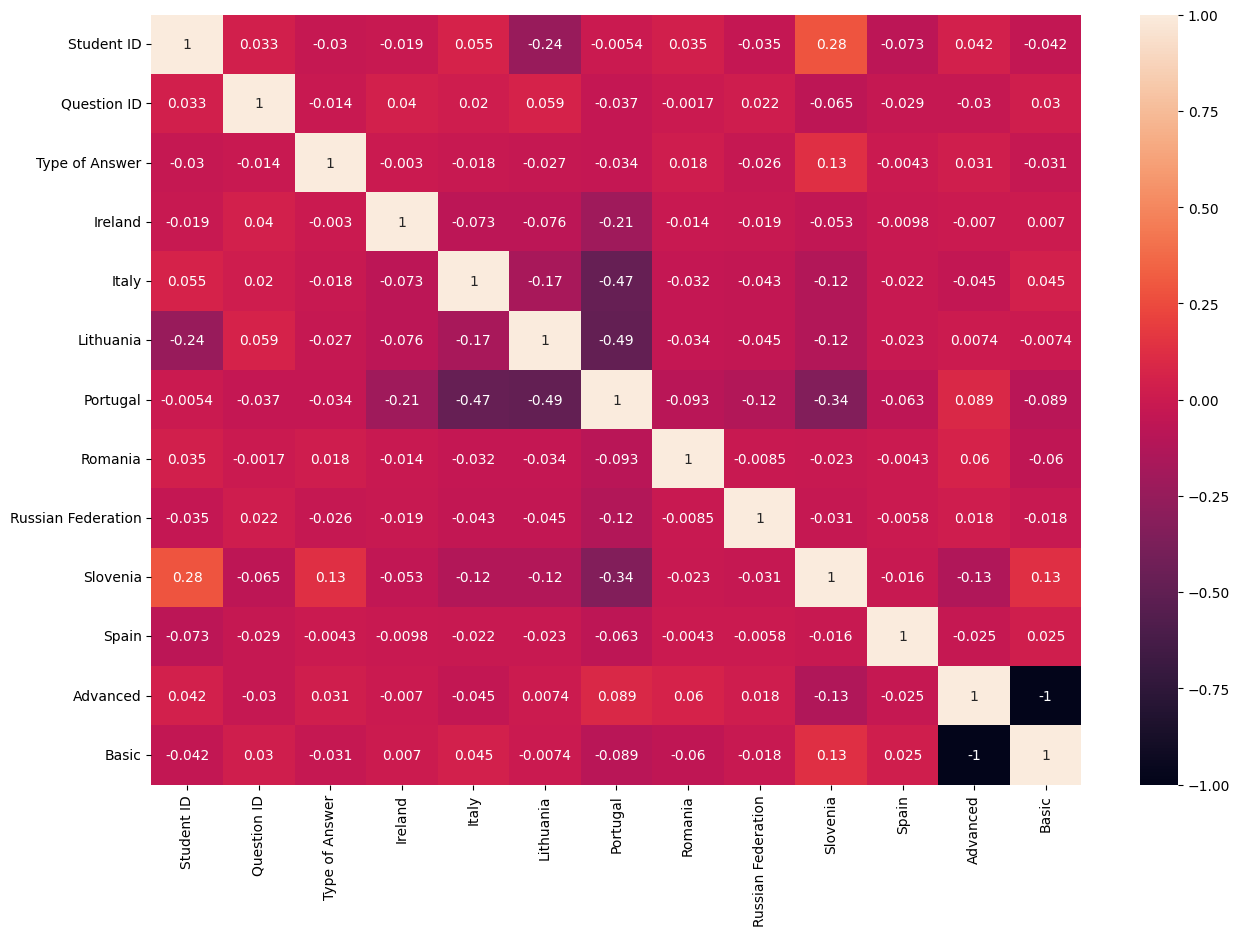

In [69]:
# Матрица корреляции
plt.figure(figsize=(15, 10)).add_subplot(1,1,1)
sns.heatmap(table.corr(), annot = True)
plt.show()

<Axes: title={'center': 'Student ID'}, ylabel='Frequency'>

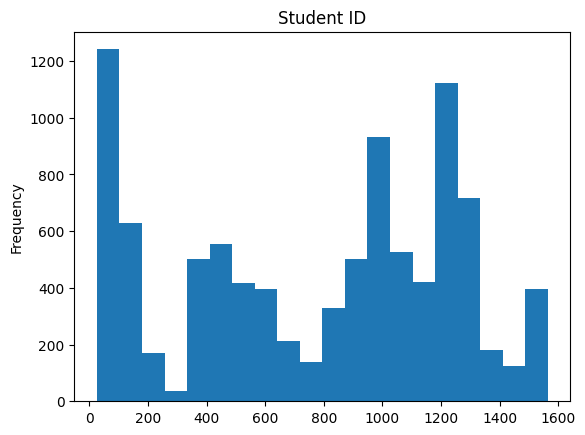

In [70]:
table['Student ID'].plot(kind='hist', bins=20, title='Student ID')
# Распределение id студентов

(array([5076.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4470.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

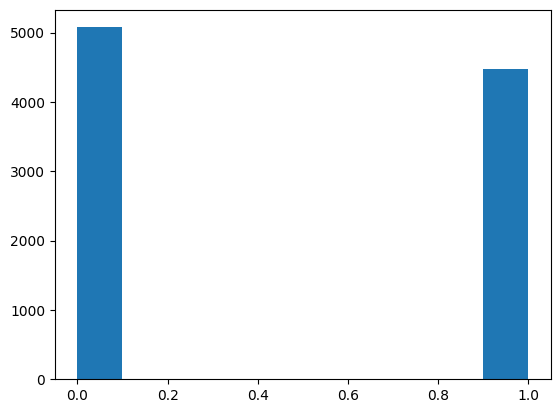

In [71]:
plt.hist(table['Type of Answer'])
# Распределение типов ответа

<Axes: xlabel='Student ID', ylabel='Type of Answer'>

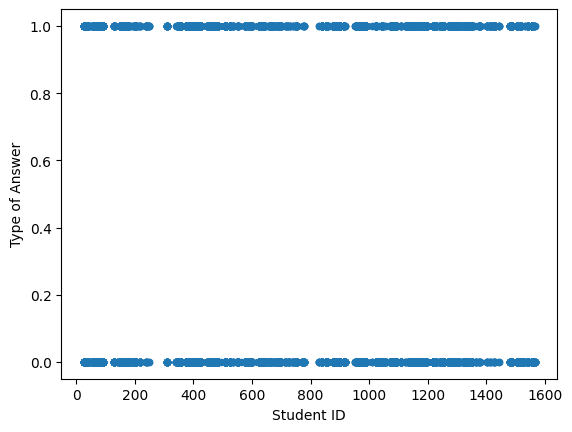

In [72]:
table.plot(kind='scatter', x='Student ID', y='Type of Answer')
# Тип ответа не зависит от id студента

(array([1702.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        7844.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

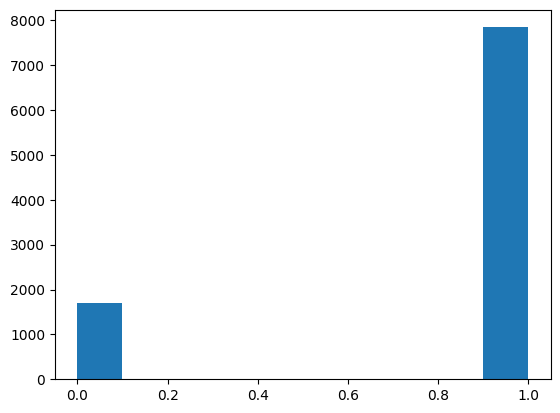

In [47]:
plt.hist(table['Basic'].astype(int))
# Распределение уровня вопросов (базовый)
# Базовых вопросов намного больше

(array([7844.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        1702.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

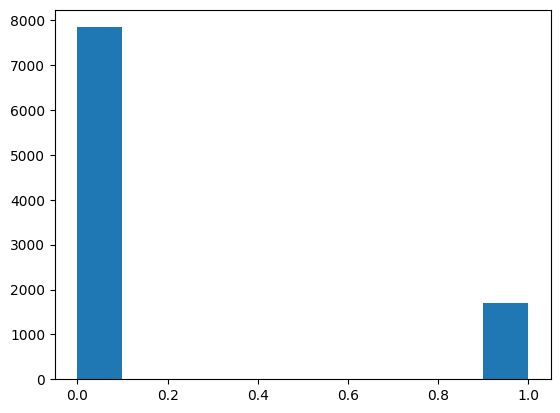

In [74]:
plt.hist(table['Advanced'].astype(int))
# Распределение уровня вопросов (продвинутый)
# Продвинутых вопросов намного меньше

<Axes: title={'center': 'Question ID'}>

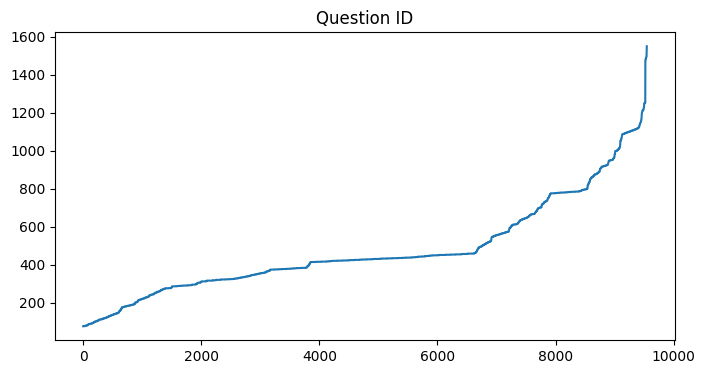

In [75]:
table['Question ID'].plot(kind='line', figsize=(8, 4), title='Question ID')
# Видим, что вопросов с id от 1200 до 1600 очень мало
# Больше всего с id ~400

<Axes: title={'center': 'Question ID'}, ylabel='Frequency'>

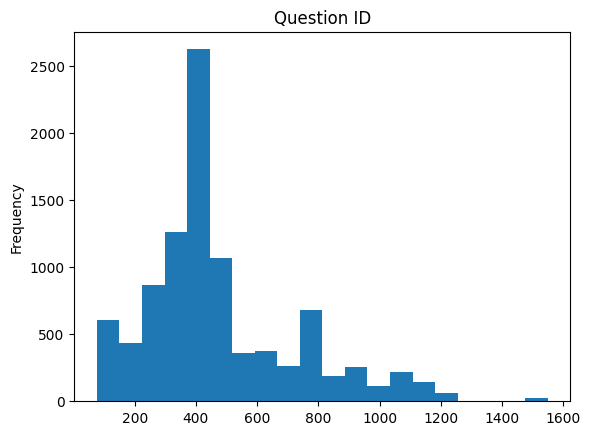

In [83]:
table['Question ID'].plot(kind='hist', bins=20, title='Question ID')
# Интерпритация предыдущего графика в виде гистограммы

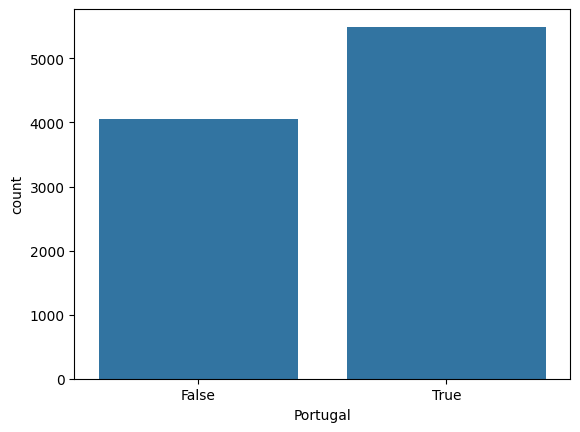

In [76]:
sns.countplot(x=table["Portugal"]);
# Большая часть студентов из португалии

<ipython-input-77-39efeb2529ec>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data, x='Student ID', y='Student Country', inner='stick', palette='Dark2')


<Axes: xlabel='Student ID', ylabel='Student Country'>

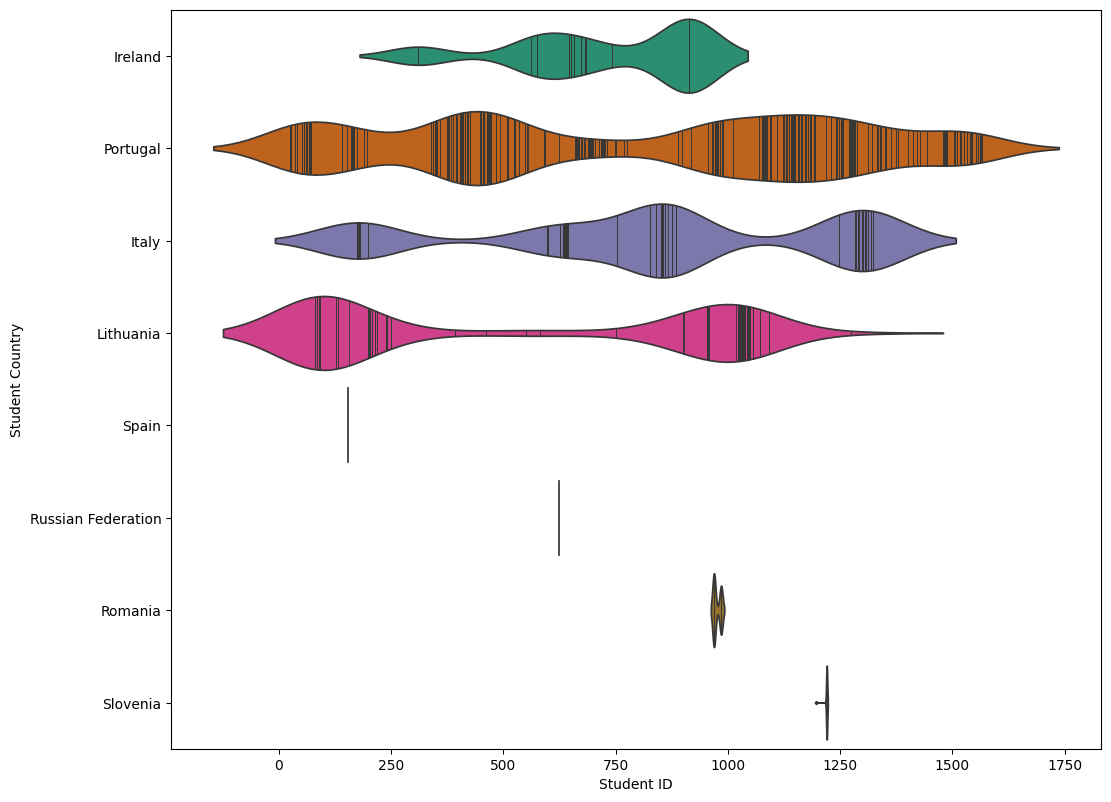

In [77]:
figsize = (12, 1.2 * len(data['Student Country'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='Student ID', y='Student Country', inner='stick', palette='Dark2')
# Распределение id студентов по странам

<Axes: ylabel='Student Country'>

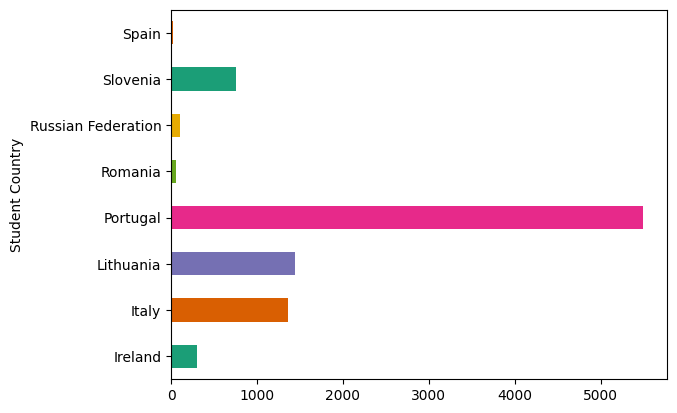

In [78]:
data.groupby('Student Country').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
# Распределение студентов по странам

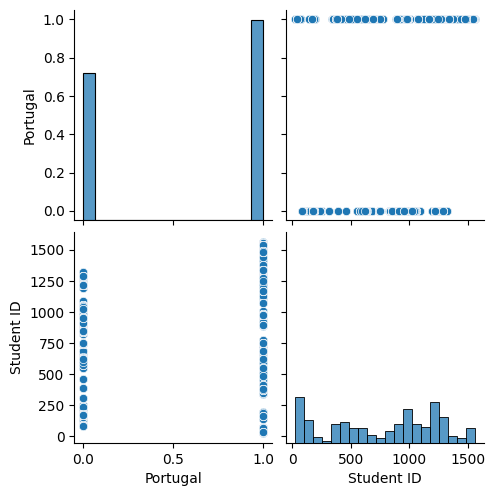

In [79]:
sns.pairplot(table[['Portugal', 'Student ID']])
# Студенты с самым высоким id из португалии

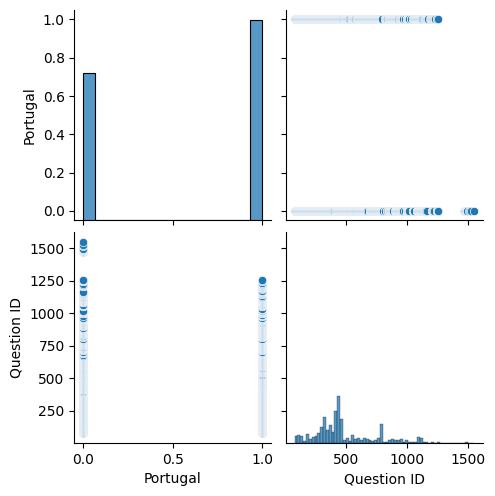

In [80]:
sns.pairplot(table[['Portugal', 'Question ID']])
# У студентов из португалии id вопроса меньше 1250

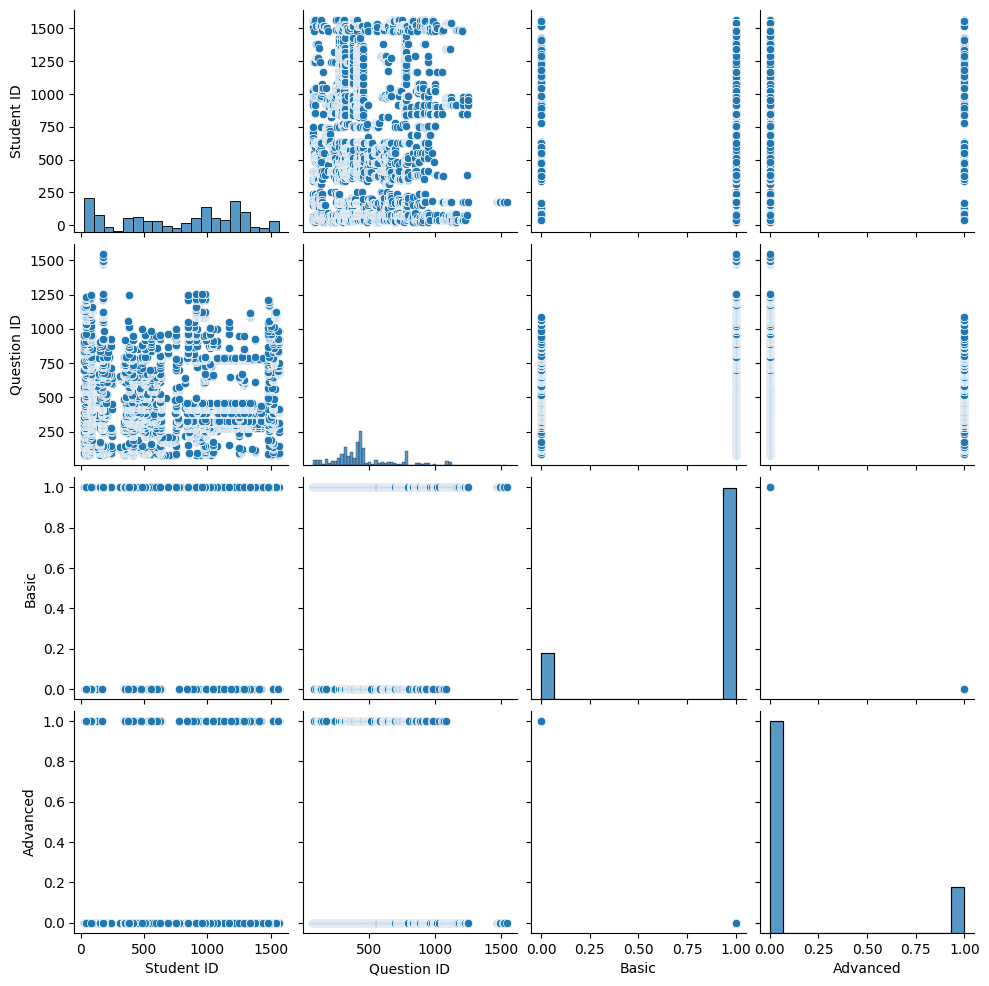

In [81]:
sns.pairplot(table[['Student ID', 'Question ID', 'Basic', 'Advanced']])
# Зависимости всех столбцов